# Units

If you're reading this, you probably don't need me to tell you how important units are. But to drive home the point, getting your units wrong can lead to some [pretty catastrophic, and expensive, failures](https://en.wikipedia.org/wiki/Mars_Climate_Orbiter#Cause_of_failure). **Astropy** provides units and constants that attach to quantities and arrays to make working with units easier.

Below we demonstrate by example how astropy units and constants can be used together to make calculations with astrophysical quantities easier. We estimate the mass of the galaxy given the Sun's velocity and orbital distance around the galactic centre.

First we need to load our typical libraries, as well as the units and constants libraries from Astropy.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
from astropy import units as u
from astropy import constants as c

Our sun is approximately in a circular Keplerian orbit about the galactic centre in the galactic plane, with radius 8.5 kpc, and circumgalactic speed ~ 220 km/s. If we assume that the galaxies mass is concentrated at the centre, we can write the relationship between its mass, $M_{G}$, orbital radius $R_{\odot}$, and radial velocity $v_{\odot}$ as

$$v_{\odot}^{2} / R_{\odot} = G M_{G} / R_{\odot}^{2}$$

where $G$ is the gravitational constant.

We can write the radius in terms of kiloparsecs using the `kpc` unit

In [178]:
R = 8.5 * u.kpc

We could also initialise this more verbosely using the `Quantity` object initialiser.

In [179]:
R = u.Quantity(8.5,unit=u.kpc)

This variable contains the value and the unit, but both can be returned individually using the `value` and `unit` functions respectively. 

In [180]:
R

<Quantity 8.5 kpc>

In [141]:
R.value

8.5

In [143]:
R.unit

Unit("kpc")

Compatible units can be checked for equivalency. For example, we could specify the distance in terms of parsecs, rather than kiloparsecs. Both definitions are equivalent, as they should be. 

In [146]:
R2 = 8500 * u.pc

In [148]:
R == R2

array(True, dtype=bool)

We can convert between different units using the `to` function. In the equation above, the radius must be supplied in astronomical units (AU), so we provide this as the first argument.

In [181]:
R = R.to(u.AU)
R

<Quantity 1753250853.086583 AU>

Common astrophysical constants are available from the constants library. Each one is supplied with its relevant units. In our equation, we require the gravitational constant $G$.

In [182]:
c.G

<Constant name=u'Gravitational constant' value=6.67384e-11 uncertainty=8e-15 unit='m3 / (kg s2)' reference=u'CODATA 2010'>

Units can be combined. We are given the velocity in km/s, which can be written easily as so. 

In [183]:
v = 220 * u.km / u.s
v

<Quantity 220.0 km / s>

We now have all of the variables necessary to calculate the mass of the galaxy within the sun's orbit. All of the units are retained throughout the calculation.

In [184]:
Mg = v**2 * R / c.G
Mg

<Quantity 1.2714919939553631e+24 AU kg km2 / m3>

The units look a bit unwieldy in their current form. To simplify them, we use the `decompose` function. This returns the mass in SI units, kg.

In [185]:
Mg.decompose()

<Quantity 1.9021249490781958e+41 kg>

We can also decompose to a different unit system by specifying it as the first argument to `decompose`.

In [187]:
Mg.decompose(u.cgs.bases)

<Quantity 1.902124949078196e+44 g>

If the average star is of similar mass to the Sun, then we can estimate the total number of stars in the galaxy. to convert this mass to solar masses, use `to`.

In [190]:
Mg.to(u.Msun)

<Quantity 95627416875.88338 solMass>

We could alternatively divide by the solar mass to return a dimensionless quantity. 

In [191]:
Mg / c.M_sun

<Quantity 6.392297993843262e-07 AU km2 / m3>

In [192]:
(Mg / c.M_sun).decompose()

<Quantity 95627416875.88338>

#### Functions
Units can also be used in functions. To ensure that the correct units are used in a given function a decorator can be specified that ensures that the correct units are supplied to the arguments. In the function below, the velocity is returned for a given galaxy mass and radius. We require that the galaxy mass is in kilograms, and the radius in AU.

In [166]:
@u.quantity_input(mg=u.kg,r=u.AU)
def velocity(mg,r):
    return (c.G * mg / r)**0.5
    
velocity(Mg,5*u.AU)

<Quantity 4119644.19068906 km / s>

If the units supplied are not convertable the function will return an error.

In [169]:
velocity(Mg,5*u.kg)

UnitsError: Argument 'r' to function 'velocity' must be in units convertable to 'AU'.

Units can also be provided to numpy arrays. Here, we calculate the velocity for an array of values and plot the velocity profile. The array of velocoty values is given the correct units of km/s.

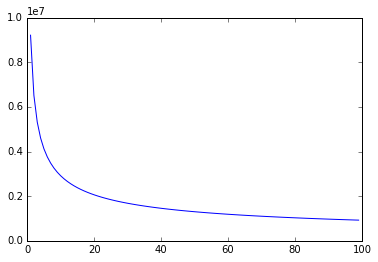

<Quantity [ 9211804.45349284, 6513729.39602923, 5318437.78094629,
            4605902.22674642, 4119644.19068906, 3760703.42022585,
            3481734.81572848, 3256864.69801461, 3070601.48449762,
            2913028.343312  , 2777463.54676006, 2659218.89047314,
            2554894.86897046, 2461958.2984949 , 2378477.68245981,
            2302951.11337321, 2234190.75084036, 2171243.13200974,
            2113332.87897017, 2059822.09534453, 2010180.53310773,
            1963963.30841248, 1920794.00802841, 1880351.71011293,
            1842360.89069857, 1806583.48706773, 1772812.59364876,
            1740867.40786424, 1710589.14321223, 1681837.69816819,
            1654488.92108117, 1628432.34900731, 1603569.32638629,
            1579811.43038348, 1557079.14551932, 1535300.74224881,
            1514411.3234092 , 1494352.0096243 , 1475069.24035129,
            1456514.171656  , 1438642.15528419, 1421412.28636966,
            1404787.00934118, 1388731.77338003, 1373214.73022969,
          

In [176]:
r = np.arange(1,100)
r = r * u.AU

v = velocity(Mg,r)

plt.plot(r,v)
plt.show()

v

#### Alternative unit systems
Other unit systems are available. For example, if we wish, we can import the imperial system of units and calculate the volume of the sun in terms of teaspoons. 

In [177]:
from astropy.units import imperial
imperial.tsp


V = 4/3 * np.pi * c.R_sun**3
V.to(imperial.tsp)

<Quantity 2.144392856040122e+32 tsp>

#### Equivalencies

Certain units are equivalent in a given context. For example, the frequency and wavelength of light are related by the speed of light, so we should be able to convert between them. However, doing this directly using the `to` function fails.

In [195]:
(450. * u.nm).to(u.GHz)

UnitConversionError: 'nm' (length) and 'GHz' (frequency) are not convertible

Astropy accounts for this through equivalencies, which allows the conversion of equivalent units in certain contexts. In the light case, the equivalency is spectral, so we specify the equivalency as so.

In [9]:
(450. * u.nm).to(u.GHz, equivalencies=u.spectral())

<Quantity 666205.4622222221 GHz>

The `find_equivalent_units` function can be used to list all directly compatible units, as well as all equivalencies when the required equivalency is provided.

In [10]:
u.nm.find_equivalent_units()

  Primary name | Unit definition | Aliases              
[
  AU           | 1.49598e+11 m   | au, astronomical_unit ,
  Angstrom     | 1e-10 m         | AA, angstrom          ,
  cm           | 0.01 m          | centimeter            ,
  lyr          | 9.46073e+15 m   | lightyear             ,
  m            | irreducible     | meter                 ,
  micron       | 1e-06 m         |                       ,
  pc           | 3.08568e+16 m   | parsec                ,
  solRad       | 6.95508e+08 m   | R_sun, Rsun           ,
]

In [11]:
u.nm.find_equivalent_units(equivalencies=u.spectral())

  Primary name | Unit definition        | Aliases              
[
  AU           | 1.49598e+11 m          | au, astronomical_unit ,
  Angstrom     | 1e-10 m                | AA, angstrom          ,
  Bq           | 1 / s                  | becquerel             ,
  Ci           | 2.7027e-11 / s         | curie                 ,
  Hz           | 1 / s                  | Hertz, hertz          ,
  J            | kg m2 / s2             | Joule, joule          ,
  Ry           | 2.17987e-18 kg m2 / s2 | rydberg               ,
  cm           | 0.01 m                 | centimeter            ,
  eV           | 1.60218e-19 kg m2 / s2 | electronvolt          ,
  erg          | 1e-07 kg m2 / s2       |                       ,
  k            | 100 / m                | Kayser, kayser        ,
  lyr          | 9.46073e+15 m          | lightyear             ,
  m            | irreducible            | meter                 ,
  micron       | 1e-06 m                |                       ,
  pc      

You can find details for other equivalencies in the [Astropy documentation](http://docs.astropy.org/en/stable/units/equivalencies.html)